In [2]:
#import iterpools
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.ticker as ticker 
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
import itertools 
import seaborn as sns

In [3]:

##Dowload data from cloud ###

In [4]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-12-30 23:34:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-12-30 23:34:30 (13.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [5]:
kf=pd.read_csv('loan_train.csv')
kf.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
kf.shape

(346, 10)

In [7]:
kf['due_date']=pd.to_datetime(kf['due_date'])
kf['effective_date']=pd.to_datetime(kf['effective_date'])
kf.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [24]:

kf['dayofweek'] = kf['effective_date'].dt.dayofweek

bins = np.linspace(kf.dayofweek.min(), kf.dayofweek.max(), 10)

#g = sns.FacetGrid(kf, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)

#g.map(plt.hist, 'dayofweek', bins=bins, ec="k")

#g.axes[-1].legend()

#plt.show()

In [25]:
## To understand tha working days 

In [26]:
kf['weekend'] = kf['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
kf.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [27]:
kf.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

In [28]:
## label gender as binary number male 0 and female 1

In [29]:
kf['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
kf.head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [30]:
kf.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [31]:
kf[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [32]:
## To understand feature  

In [33]:
feature=kf[['Principal','terms','age','Gender','weekend',]]
feature=pd.concat([feature,pd.get_dummies(kf['education'])],axis=1)
feature.drop(['Master or Above'], axis=1,inplace=True)
feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [34]:
x=feature
x[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [35]:
y=kf['loan_status'].values
y[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [36]:
# As some features are big number we need to normalize our datas to fit 

x=preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [37]:
from sklearn.model_selection import train_test_split
# our data set could be split to diffrent ratio as test and train shuffled to random  number 

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30, random_state=21)

In [39]:
print('the features shapes:', x_train.shape)

the features shapes: (316, 8)


In [40]:
# We have 316 to 8 matrix data for training 

In [41]:
print('the feature test shapes:', x_test.shape)

the feature test shapes: (30, 8)


In [42]:
# We have 30 to 8 test data 

In [43]:
print('the label train shape:', y_train.shape)

the label train shape: (316,)


In [44]:
print('the label test shape:',y_test.shape)

the label test shape: (30,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from sklearn import metrics

In [47]:
# For k=15 neighbours we  train our data and find the best k

k=15
men_acc=np.zeros((k-1))
std_acc=np.zeros((k-1))
confussionMatx=[];

for n in range(1,k):
    
   clf=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
   yt=clf.predict(x_test)
   men_acc[n-1]=metrics.accuracy_score(y_test,yt)
   std_acc[n-1]=np.std(yt==y_test)/np.sqrt(yt.shape[0])
men_acc

array([0.53333333, 0.46666667, 0.46666667, 0.43333333, 0.53333333,
       0.53333333, 0.56666667, 0.6       , 0.63333333, 0.6       ,
       0.56666667, 0.63333333, 0.56666667, 0.53333333])

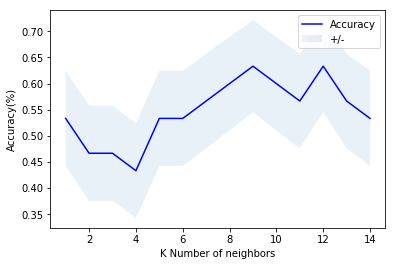

In [48]:
plt.plot(range(1,k), men_acc,'b')
plt.fill_between(range(1,k),men_acc-1*std_acc,men_acc+1*std_acc,alpha=0.10)

plt.xlabel('K Number of neighbors')
plt.ylabel('Accuracy(%)')
plt.legend(('Accuracy','+/-'))



In [49]:
print('best performnace is', men_acc.max(), 'with k=', men_acc.argmax()+1)

best performnace is 0.6333333333333333 with k= 9


In [50]:
clf1=KNeighborsClassifier(n_neighbors=9).fit(x_train,y_train)
clf1

yt2=clf1.predict(x_test)
yt2[0:5]

print('Train accuracy:',metrics.accuracy_score(y_train,clf.predict(x_train)))

Train accuracy: 0.7848101265822784


In [51]:
print('test accuracy:', metrics.accuracy_score(y_test,yt2))


test accuracy: 0.6333333333333333


In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print (classification_report(y_test,yt2))
f1_scr1=f1_score(y_test,yt2, average='weighted')
print('f_1 score is:', f1_scr1)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         9
     PAIDOFF       0.70      1.00      0.82        21

   micro avg       0.70      0.70      0.70        30
   macro avg       0.35      0.50      0.41        30
weighted avg       0.49      0.70      0.58        30

f_1 score is: 0.5764705882352941


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

In [110]:
from sklearn.metrics import jaccard_similarity_score
Jac1=jaccard_similarity_score(y_test,yt2)
print('Jaccard_similarity is:', Jac1)

Jaccard_similarity is: 0.7


In [111]:
#### Desicion tree #######
from sklearn.tree import DecisionTreeClassifier 

In [112]:
import numpy as np
m=15
men_acc=np.zeros((m-1))
std_acc=np.zeros((m-1))
confusionMax=[];
for n in range (1,m):
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=n).fit(x_train,y_train)
    yt=clf.predict(x_test)
    men_acc[n-1]=metrics.accuracy_score(y_test, yt)
    std_acc[n-1]=np.std(yt==y_test)/np.sqrt(yt.shape[0])
    
men_acc
    

array([0.7       , 0.7       , 0.7       , 0.5       , 0.53333333,
       0.53333333, 0.53333333, 0.53333333, 0.6       , 0.53333333,
       0.6       , 0.5       , 0.43333333, 0.43333333])

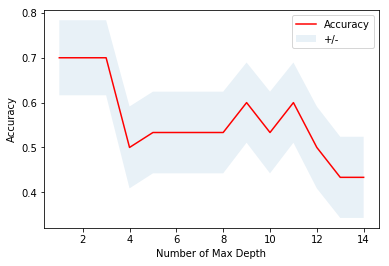

In [113]:
plt.plot(range(1,m),men_acc,'r')
plt.fill_between(range(1,m),men_acc-1*std_acc,men_acc+1*std_acc,alpha=0.10)
plt.ylabel('Accuracy')
plt.xlabel('Number of Max Depth')
plt.legend(('Accuracy','+/-'))

In [114]:
print('best performnace is', men_acc.max(), 'with m=', men_acc.argmax()+1)

best performnace is 0.7 with m= 1


In [115]:
### Building the decision tree  for max depth of 9 
clfD=DecisionTreeClassifier(criterion="entropy", max_depth=9)
clfD
clfD.fit(x_train,y_train)
ytD=clfD.predict(x_test)
print('Train Acc:',metrics.accuracy_score(y_train,clfD.predict(x_train)))
print('Test Acc:', metrics.accuracy_score(y_test, ytD))


Train Acc: 0.8607594936708861
Test Acc: 0.6


In [116]:
print('Confusion Matrix \n',classification_report(y_test,ytD))
f1_scr2=f1_score(y_test,ytD, average='weighted')
print('f_1 score is:', f1_scr2)

Confusion Matrix 
               precision    recall  f1-score   support

  COLLECTION       0.33      0.33      0.33         9
     PAIDOFF       0.71      0.71      0.71        21

   micro avg       0.60      0.60      0.60        30
   macro avg       0.52      0.52      0.52        30
weighted avg       0.60      0.60      0.60        30

f_1 score is: 0.6


In [117]:

Jac2=jaccard_similarity_score(y_test,ytD)
print('Jaccard_similarity is:', Jac2)

Jaccard_similarity is: 0.6


In [118]:
####  SVM Classification ####
from sklearn import svm


In [119]:
clf1=svm.SVC(kernel='rbf').fit(x_train, y_train)
yt1=clf1.predict(x_test)
svm_rbf=metrics.accuracy_score(y_test,yt1)

### svm with linear kernel
clf2=svm.SVC(kernel='linear').fit(x_train,y_train)
yt2=clf2.predict(x_test)
svm_lnr=metrics.accuracy_score(y_test, yt2)

## svm with polynomnal kernel #
clf3=svm.SVC(kernel='poly').fit(x_train,y_train)
yt3=clf3.predict(x_test)
svm_pl=metrics.accuracy_score(y_test, yt3)

## SVM with Sigmoidal Kernel ##
clf4=svm.SVC(kernel='sigmoid').fit(x_train,y_train)
yt4=clf4.predict(x_test)
svm_sgm=metrics.accuracy_score(y_test,yt4)

print('SVM with RBF kernel',svm_rbf)

print('SVM with Linear kernel',svm_lnr)

print('SVM with polynominal kernel',svm_pl)

print('SVM with Sigmoid kernel',svm_sgm)



SVM with RBF kernel 0.5666666666666667
SVM with Linear kernel 0.7
SVM with polynominal kernel 0.7
SVM with Sigmoid kernel 0.4666666666666667


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [120]:
## To find missing label 

print(set(y_test)-set(yt1))
print(set(y_test)-set(yt2))
print(set(y_test)-set(yt3))
print(set(y_test)-set(yt4))


set()
{'COLLECTION'}
{'COLLECTION'}
set()


In [ ]:
# It seems second and third methods are missing label of 'COLLECTION' so we can only choose first or last method 
# As accuracy of firt method is higher than last one we should pick first one with RBF kernel

In [123]:
### the highest score is 0.7 for linear and polynominal kernel

clfS=svm.SVC(kernel='rbf').fit(x_train,y_train)
ytS=clf.predict(x_test)
ytS[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [124]:
# The classification report is 
print('The train accuracy is:', metrics.accuracy_score(y_train,clfS.predict(x_train)))
print('The test accuracy is:',metrics.accuracy_score(y_test,ytS))



The train accuracy is: 0.7848101265822784
The test accuracy is: 0.43333333333333335


In [125]:
## To print confusion matrix #
print(' Classifcation report:\n', classification_report(y_test,ytS))
f1_scr3=f1_score(y_test,ytS, average='weighted')
print('f_1 score is:', f1_scr3)

 Classifcation report:
               precision    recall  f1-score   support

  COLLECTION       0.10      0.11      0.11         9
     PAIDOFF       0.60      0.57      0.59        21

   micro avg       0.43      0.43      0.43        30
   macro avg       0.35      0.34      0.35        30
weighted avg       0.45      0.43      0.44        30

f_1 score is: 0.4413350449293966


In [126]:
# To calculate Jaccard index ##
print('The Jaccardi Index is:\n',jaccard_similarity_score(y_test, ytS))
Jac3=jaccard_similarity_score(y_test,ytS)
print('Jaccard_similarity is:', Jac3)

The Jaccardi Index is:
 0.43333333333333335
Jaccard_similarity is: 0.43333333333333335


In [127]:
## Logistic Regression ###

from sklearn.linear_model import LogisticRegression

### classification for liblinear solver
clf11=LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
yt11=clf11.predict(x_test)
clf11_lib=metrics.accuracy_score(y_test, yt11)

### classification for sag solver 
clf22=LogisticRegression(C=0.01, solver='sag').fit(x_train, y_train)
yt22=clf22.predict(x_test)
clf22_sag=metrics.accuracy_score(y_test, yt22)

### classification for saga solver 
clf33=LogisticRegression(C=0.01, solver='saga').fit(x_train, y_train)
yt33=clf33.predict(x_test)
clf33_saga=metrics.accuracy_score(y_test, yt33)

### classification for newton-cg solver
clf44=LogisticRegression(C=0.01, solver='newton-cg').fit(x_train, y_train)
yt44=clf44.predict(x_test)
clf44_new=metrics.accuracy_score(y_test, yt44)

### classification for lbfgs solver 
clf55=LogisticRegression(C=0.01, solver='lbfgs').fit(x_train, y_train)
yt55=clf55.predict(x_test)
clf55_lbf=metrics.accuracy_score(y_test, yt55)

print(' Logistic Regression with liblinear solver:\n', clf11_lib)
print(' Logistic Regression with sag solver:\n', clf22_sag)
print(' Logistic Regression with saga solver:\n', clf33_saga)
print(' Logistic Regression with newton-cg solver:\n', clf44_new)
print(' Logistic Regression with lbfgs solver:\n', clf55_lbf)


 Logistic Regression with liblinear solver:
 0.5666666666666667
 Logistic Regression with sag solver:
 0.7
 Logistic Regression with saga solver:
 0.7
 Logistic Regression with newton-cg solver:
 0.7
 Logistic Regression with lbfgs solver:
 0.7


In [128]:
## To find missing label 

print(set(y_test)-set(yt11))
print(set(y_test)-set(yt22))
print(set(y_test)-set(yt33))
print(set(y_test)-set(yt44))
print(set(y_test)-set(yt55))

set()
{'COLLECTION'}
{'COLLECTION'}
{'COLLECTION'}
{'COLLECTION'}


In [129]:
## All solver are missing 'collection ' from labesl except liblinear
# So liblinear can be set as classifier 

clfL=LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
ytL=clfL.predict(x_test)

print('Train Accuracy:\n',metrics.accuracy_score(y_train,clfL.predict(x_train)))
print('Test Accuracy:\n',metrics.accuracy_score(y_test,ytL))

Train Accuracy:
 0.7626582278481012
Test Accuracy:
 0.5666666666666667


In [130]:
print('The classification report:\n', classification_report(y_test,yt))
f1_scr4=f1_score(y_test,ytL, average='weighted')
print('f_1 score is:', f1_scr4)

The classification report:
               precision    recall  f1-score   support

  COLLECTION       0.10      0.11      0.11         9
     PAIDOFF       0.60      0.57      0.59        21

   micro avg       0.43      0.43      0.43        30
   macro avg       0.35      0.34      0.35        30
weighted avg       0.45      0.43      0.44        30

f_1 score is: 0.5377777777777778


In [131]:
## Jaccardi Test ##

Jac4=jaccard_similarity_score(y_test,ytL)
print('Jaccard_similarity is:', Jac4)

Jaccard_similarity is: 0.5666666666666667


In [132]:
## Log Loss Test ##

from sklearn.metrics import log_loss

yt_prob=clf.predict_proba(x_test)
yt_log=log_loss(y_test,yt_prob)
print('Log Loss is:\n', yt_log)

Log Loss is:
 13.961578112453404


In [134]:
## To prepare final report for evaluation
Jaccardi=[Jac1,Jac2,Jac3,Jac4]
F1_scores=[f1_scr1,f1_scr2,f1_scr3,f1_scr4]
Logloss=['Na','NA','NA',yt_log]

kd={'Method':['KNN','Decision Tree',' SVM','Logistic Reg'], 'Jaccardi':Jaccardi,'F1_scores': F1_scores,'LogLoss':Logloss}
report=pd.DataFrame(data=kd,columns=['Method', 'Jaccardi', 'F1_scores','LogLoss'],index=None)
print(' Finall Report is:\n\n',report)

 Finall Report is:

           Method  Jaccardi  F1_scores  LogLoss
0            KNN  0.700000   0.576471       Na
1  Decision Tree  0.600000   0.600000       NA
2            SVM  0.433333   0.441335       NA
3   Logistic Reg  0.566667   0.537778  13.9616
